In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.cluster import KMeans  

In [30]:
df = pd.read_csv('Mall_Customers.csv') 

In [31]:
df.drop('CustomerID', axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [32]:
df = pd.get_dummies(df,drop_first=True) 
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


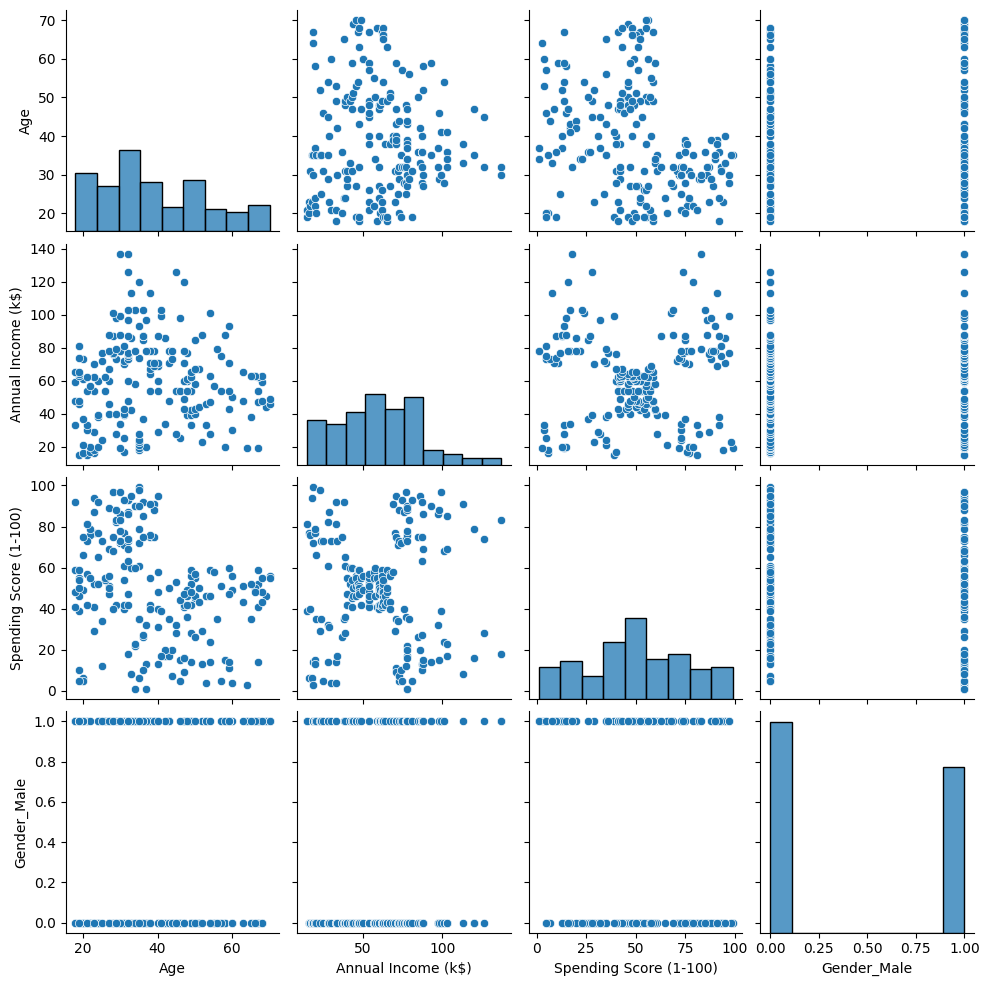

In [33]:
# we will find that the relation between Annual Income (k$) and Spending Score (1-100)  the most one to separate the data
sns.pairplot(df)

In [41]:
km = KMeans(n_clusters=5)   
predictions = km.fit_predict(df)    

In [42]:
predictions

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [43]:
df.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male'], dtype='object')

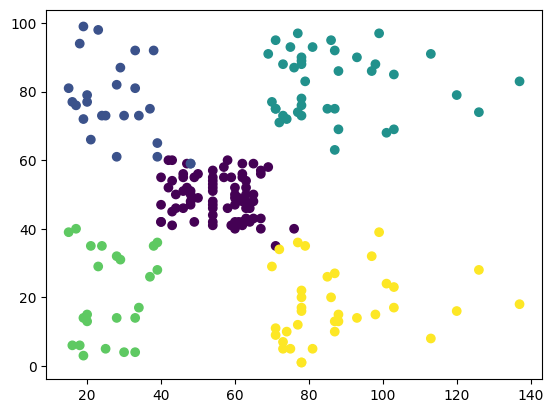

In [44]:
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=predictions)

# Elbow 
<B>The Elbow Method depends on the inertia (also called the within-cluster sum of squares, WCSS)</B>

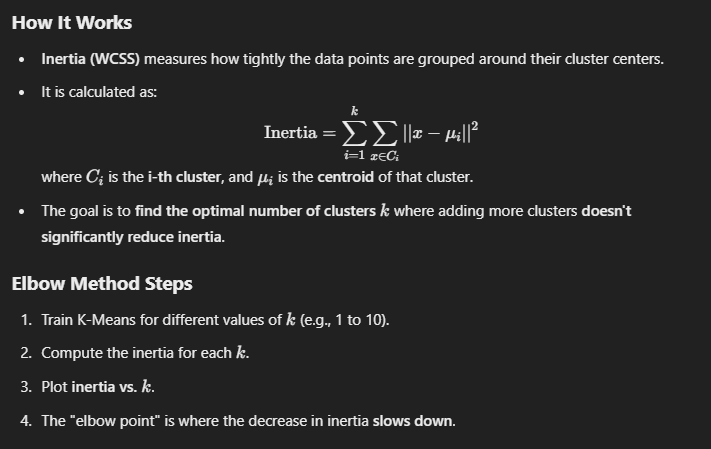

1 308862.06000000006
2 221136.44188596494
3 158703.7385836386
4 110045.92297541513
5 97950.55017448479
6 72142.12903528877
7 51165.18423710792
8 44357.326649026654
9 44036.84832043178
10 38676.20489612511
11 37766.051814416525
12 32808.42788790157
13 33454.17080419581
14 30184.298630488876
15 27111.450516442623
16 25627.500833188136
17 24871.968795278797
18 23609.641955559066
19 20729.537576312578


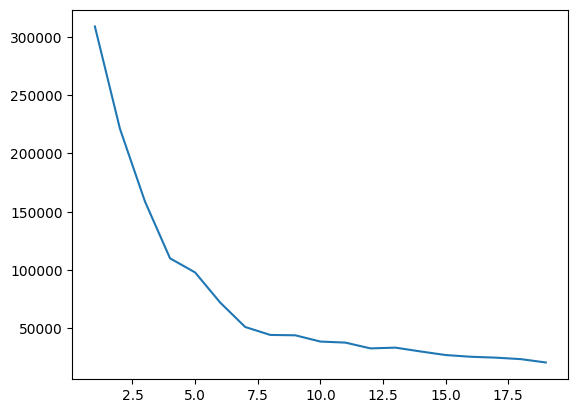

In [45]:
lo_inertias = []    
for i in range(1,20):    
    km = KMeans(n_clusters=i)    
    km.fit(df)    
    lo_inertias.append(km.inertia_)    
    print(i,km.inertia_)    
plt.plot(range(1,20),lo_inertias)

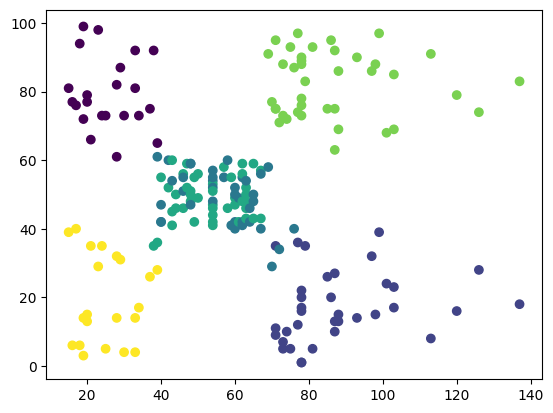

In [46]:
# trial with 6 clusters
km = KMeans(n_clusters=6)    
predictions = km.fit_predict(df)    
plt.scatter(df.iloc[:,1],df.iloc[:,2],c=predictions)